In [79]:
import netCDF4 as nc
from pprint import pprint
import matplotlib.pyplot as plt

## Explore netCDF HEMCO geographical emissions data

For some cool plotting we could try using NASA's Panoply. Other PLs might support better netCDF data interfaces, like R, MATLAB, etc.

In [80]:
ds = nc.Dataset('./data/N2O-em-anthro_CMIP_CEDS_1754.nc', format="NETCDF4")
pprint(ds.dimensions)

{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 360,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 720,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 12}


In [85]:
metadata = ds.__dict__
print(metadata['title'])
# print(metadata['VOC_name'])
print(metadata['frequency'])
# print(metadata['molecular_weight'], metadata['molecular_weight_unit'])
print(metadata['nominal_resolution'])
print(metadata['realm'])
# metadata

Annual Anthropogenic Emissions of N2O prepared for input4MIPs
mon
50 km
atmos


In [142]:
for var in ds.variables:
    print(f"{var}: {ds.variables[var].long_name}")

time: time
lon: longitude
lat: latitude
N2O_agr: N2O anthropogenic emissions from non-combustion agricultural sector
N2O_ene: N2O anthropogenic emissions from energy transformation and extraction
N2O_ind: N2O anthropogenic emissions from industrial combustion and processes
N2O_rco: N2O anthropogenic emissions from residential, commercial, and other
N2O_shp: N2O anthropogenic emissions from international shipping
N2O_slv: N2O anthropogenic emissions from solvents
N2O_tra: N2O anthropogenic emissions from surface Transportation (Road, Rail, Other)
N2O_wst: N2O anthropogenic emissions from waste disposal and handling


In [139]:
ds.variables['N2O_tra'][:][0]

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

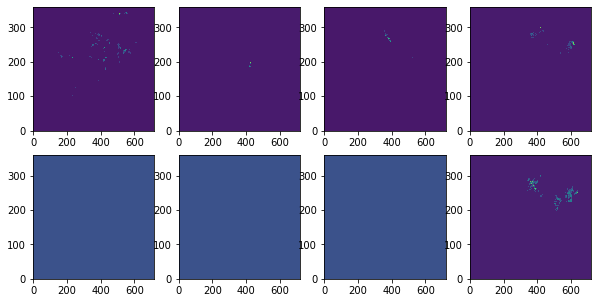

In [145]:
f, axs = plt.subplots(2,4, figsize = (10,5))
axs[0, 0].contourf(ds.variables['N2O_agr'][:][0])
axs[0, 1].contourf(ds.variables['N2O_ene'][:][0])
axs[0, 2].contourf(ds.variables['N2O_ind'][:][0])
axs[0, 3].contourf(ds.variables['N2O_rco'][:][0])
axs[1, 0].contourf(ds.variables['N2O_shp'][:][0])
axs[1, 1].contourf(ds.variables['N2O_slv'][:][0])
axs[1, 2].contourf(ds.variables['N2O_tra'][:][0])
axs[1, 3].contourf(ds.variables['N2O_wst'][:][0])

plt.show()

In [146]:
ds.close()

### Takeaways
Datasets are separated by different chemical compounds. The .nc files contain metadata, dimensions, and variables. The dimensions denote how the variables are separated indexed in the dataset (I think?). In these datasets we have 3 dimensions, time, latitude, and longitude. The latitude and longitude granularity is usually 50 kms. This is why each of the timeseries data for the actual compound vars are 3-dimensional. They have data at a particular longitude, for a particular latitude, at a particular time. We can plot using some of the 3D plotting tools on matplotlib or on Panoply. Furthermore, variables are split up by the type of emission, for example solvent or agriculture.